$\Large\textbf{Lab 2. Exercise 1. }$



Recall that we implemented the gradient descent algorithm to solve $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. The main ingredients in the gradient descent iterations are the descent direction $\mathbf{p}^k$ which is set to $-\nabla f(\mathbf{x}^k)$, and the step length $\eta^k$ which is found by solving an optimization problem (or sometimes taken as a constant value over all iterations). We used the following procedure in the previous lab:

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{p}^k = \mathbf{x}^k - \eta^k \nabla f (\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

We saw that for particular cases of quadratic functions, a closed form analytical solution for the minimizer of the optimization problem $\min_{\eta \geq 0} f({\mathbf{x}}^k + \eta {\mathbf{p}}^k)$ exists. However finding a closed form expression as a solution to this optimization problem to find a suitable step length might not always be possible. To tackle general situations, we will try to devise a different procedure in this lab. 

To find the step length, we will use the following property: 
Suppose a non-zero $\mathbf{p} \in {\mathbb{R}}^n$ is a descent direction at point $\mathbf{x}$, and let $\gamma \in (0,1)$. Then there exists $\varepsilon >0$ such that  
\begin{align}
f(\mathbf{x}+\alpha \mathbf{p}) \leq f(\mathbf{x}) + \gamma \alpha \nabla f(\mathbf{x})^\top \mathbf{p}, \ \forall \alpha \in (0,\varepsilon].  
\end{align}

The step length $\eta^k$ can be found using a backtracking procedure illustrated below to find appropriate value of $\varepsilon$.  




\begin{align}
& \textbf{Input:}  \text{ $\mathbf{x}^k$, $\mathbf{p}^k$, $\alpha^0$, $\rho \in (0,1)$, $\gamma \in (0,1)$ }  \\
& \textbf{Initialize } \alpha=\alpha^0 \\ 
&\textbf{While } f(\mathbf{x}^k + \alpha \mathbf{p}^k)   > f(\mathbf{x}^k) + \gamma \alpha \nabla f(\mathbf{x}^k)^\top \mathbf{p}^k \text{ do:}  \\   
&\quad \quad \alpha = \rho \alpha  \\
&\textbf{End While} \\
&\textbf{Output: } \alpha
\end{align}

In this exercise, we will check if finding the steplength using the backtracking procedure is advantageous for some quadratic functions. In this sample code we consider $f(\mathbf{x})=f(x_1,x_2) = (x_1-8)^2 + (x_2 + 12)^2$.

In [1]:
#numpy package will be used for most of our lab exercises. Please have a look at Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [2]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (x[1]+12)**2 + (-8+x[0])**2


In [3]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*(x[0]-8), 2*(x[1]+12)])

In [4]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf, A): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  #Complete the code to compute step length
  numerator=np.dot(gradf.transpose(),gradf)    
  denominator=2*np.dot(np.dot(gradf.transpose(),A),gradf)
  step_length=numerator/denominator    #add appropriate arguments to the function
  return step_length



In [5]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  #implement the backtracking line search
  p= -gradf
  while(evalf(x+alpha*p) > evalf(x) + gamma*alpha*np.dot(gradf.transpose(),p)):
    alpha = rho*alpha


  #print('final step length:',alpha)
  return alpha

In [6]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [16]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k 


##**Answer 3:**

In [17]:

my_start_x = np.array([1,1])
my_tol= 1e-5


x_opt,k = find_minimizer(my_start_x, my_tol, CONSTANT_STEP_LENGTH)
print('Value of optimizer for constant step length= {} and minimum value is= {} \n'.format(x_opt,evalf(x_opt)))


#check what happens when you call find_minimzer using backtracking line search
x_opt_bls,k = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print('Value of optimizer for constant step length= {} and minimum value is= {} '.format(x_opt_bls,evalf(x_opt_bls)))


Value of optimizer for constant step length= [  7.99999775 -11.99999582] and minimum value is= 2.2517218946096954e-11 

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
Value of optimizer for constant step length= [  8. -12.] and minimum value is= 0.0 


## **Answer 4:**

In [18]:
my_start_x = np.array([25,25])
my_tol= 1e-12


x_opt,k = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print('For exact line search:')
print('Minimizer = ',x_opt)
print('Minimum Value = ', evalf(x_opt))
print('Number of iterations from exact line search = ',k, '\n\n')

#check what happens when you call find_minimzer using backtracking line search
x_opt_bls,k2 = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print('For backtrack line search:')
print('Minimizer = ',x_opt_bls)
print('Minimum Value = ', evalf(x_opt_bls))
print('Number of iterations from backtracking line search = ',k2)

For exact line search:
Minimizer =  [  8. -12.]
Minimum Value =  0.0
Number of iterations from exact line search =  1 


Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
For backtrack line search:
Minimizer =  [  8. -12.]
Minimum Value =  0.0
Number of iterations from backtracking line search =  1


In both the methods, the number of iterations required are equal to 1, hence we can say that both the methods are equally good for this function.

## **Answer 5:**

In [19]:
my_start_x = np.array([25,25])
my_tol= 1e-10
alpha_values = [1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
no_of_iterations = []
for alpha in alpha_values:
  x_opt_bls,k2 = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha, 0.5,0.5)
  print('For alpha = {}:'.format(alpha))
  print('Value of optimizer= {} and minimum value is= {} and number of iterations = {} \n'.format(x_opt_bls,evalf(x_opt_bls),k2))
  no_of_iterations.append(k2)
  

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
For alpha = 1:
Value of optimizer= [  8. -12.] and minimum value is= 0.0 and number of iterations = 1 

Params for Backtracking LS: alpha start: 0.9 rho: 0.5  gamma: 0.5
For alpha = 0.9:
Value of optimizer= [  8. -12.] and minimum value is= 1.6579714975258972e-21 and number of iterations = 12 

Params for Backtracking LS: alpha start: 0.75 rho: 0.5  gamma: 0.5
For alpha = 0.75:
Value of optimizer= [  8. -12.] and minimum value is= 1.3714654556129199e-21 and number of iterations = 20 

Params for Backtracking LS: alpha start: 0.6 rho: 0.5  gamma: 0.5
For alpha = 0.6:
Value of optimizer= [  8. -12.] and minimum value is= 2.2038291998576117e-21 and number of iterations = 30 

Params for Backtracking LS: alpha start: 0.5 rho: 0.5  gamma: 0.5
For alpha = 0.5:
Value of optimizer= [  8. -12.] and minimum value is= 0.0 and number of iterations = 1 

Params for Backtracking LS: alpha start: 0.4 rho: 0.5  gamma: 0.5
For alpha = 0.4:

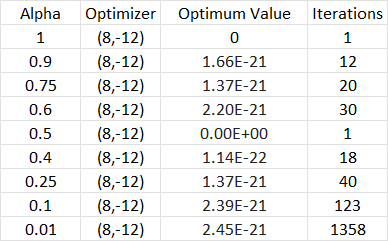

In [20]:
import matplotlib.pyplot as plt
plt.plot(alpha_values,no_of_iterations)
plt.xlabel('Alpha')
plt.ylabel('No of iterations')
plt.show();

From the table we can observe that the number of iterations increases as we decrease the alpha values from 1 to 0.6. At $α = 0.5$, the number of iterations is equal to 1 which is same for $\alpha=1$ and after 0.5, number of iterations starts increasing again. From this we can say that alpha values equal to 1 and 0.5 are most suitable for backtracking line search. It is at these values, the function is attaining the actual minimum value of 0. Otherwise it remains close to 0 and is never exactly equal to zero.

For alpha values 1 and 0.5, both the methods works equally good as both takes only iteration to reach to the optimal value. 

We have observed above that the number of iterations taken by exact linear search method is equal to 1 while for backtracking method, it depends on the value of alpha. Hence we can say that the exact line search method is a better and faster algorithm than backtracking method.

## **Answer 6:**

In [21]:
my_start_x = np.array([25,25])
my_tol= 1e-10
rho_values = [0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
no_of_iterations = []
for rho in rho_values:
  x_opt_bls,k2 = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, rho,0.5)
  print('For rho = {}:'.format(rho))
  print('Value of optimizer= {} and minimum value is= {} and number of iterations = {} \n'.format(x_opt_bls,evalf(x_opt_bls),k2))
  no_of_iterations.append(k2)

Params for Backtracking LS: alpha start: 1 rho: 0.9  gamma: 0.5
For rho = 0.9:
Value of optimizer= [  8. -12.] and minimum value is= 4.960536411900771e-22 and number of iterations = 9 

Params for Backtracking LS: alpha start: 1 rho: 0.75  gamma: 0.5
For rho = 0.75:
Value of optimizer= [  8. -12.] and minimum value is= 1.0819468296335504e-21 and number of iterations = 15 

Params for Backtracking LS: alpha start: 1 rho: 0.6  gamma: 0.5
For rho = 0.6:
Value of optimizer= [  8. -12.] and minimum value is= 7.844395544174143e-22 and number of iterations = 22 

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
For rho = 0.5:
Value of optimizer= [  8. -12.] and minimum value is= 0.0 and number of iterations = 1 

Params for Backtracking LS: alpha start: 1 rho: 0.4  gamma: 0.5
For rho = 0.4:
Value of optimizer= [  8. -12.] and minimum value is= 1.1393259623274523e-22 and number of iterations = 18 

Params for Backtracking LS: alpha start: 1 rho: 0.25  gamma: 0.5
For rho = 0.25:


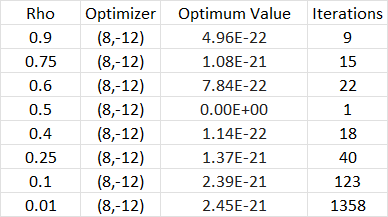

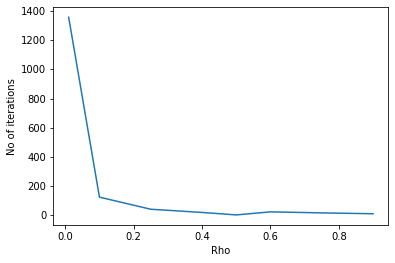

In [22]:
import matplotlib.pyplot as plt
plt.plot(rho_values,no_of_iterations)
plt.xlabel('Rho')
plt.ylabel('No of iterations')
plt.show();

From the table we can observe that the number of iterations increases as we decrease the rho values from 0.9 to 0.6. At $ρ = 0.5$, the number of iterations is equal to 1 and after 0.5, number of iterations starts increasing again. From this we can say that rho values equal to 0.5 is most suitable for back tracking line search. It is at this value, the function is attaining the actual minimum value of 0. Otherwise it remains close to 0 and is never exactly equal to zero.

For rho value of 0.5, both the methods works equally good as both takes only 1 iteration to reach to the optimal value. 

We have observed above that the number of iterations taken by exact linear search method is equal to 1 while for backtracking method, it depends on the value of rho. Hence we can say that the exact line search search method is a better and faster algorithm than backtracking method.